<a href="https://colab.research.google.com/github/susanavillar/MINERIA-DE-DATOS/blob/main/LAB_01_Ordinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **LABORATORIO 01**


> GRUPO A08



> Julia Hernández Quintas, Pablo Medieta Ruiz, Lucia Valdera Gayoso, Susana Villar Polvorosa

> ## **Práctica 1**

Importamos las librerías que nos serán necesarias a lo largo del proyecto, e insertamos nuestro DataFrame, desde Drive:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/vacunaciones.csv'

# Cargamos el archivo CSV en un DataFrame de pandas
data = pd.read_csv(ruta_archivo_drive)
data

Mounted at /content/drive


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


> #### **Conociendo nuestra Base de datos:**

A continuación analizamos y estudiamos algunas características básicas de nuestro data-frame, como puede ser tamaño, forma de las variables ... etc.

In [2]:
print("Forma del DataFrame:",data.shape)
print("Tipos de nuestras variables:",data.dtypes.unique())

Forma del DataFrame: (3208, 15)
Tipos de nuestras variables: [dtype('O') dtype('float64')]


Vemos que tenemos 3208 resgistros de jornadas(un día) de vacunación, de las cuales se han registrado 15 variables. Además podemos ver que todas estas variables son o bien float64, es decir números de punto flotante, o bien objetos.

Cada registro guarda información sobre un día de vacunanciones en uno de los países estudiados.

Veamos ahora cuantos países distintos contiene nuestra base de datos, y cuales son:

In [3]:
v = data['country'].unique()
print(v)
print(v.shape)

['Albania' 'Algeria' 'Andorra' 'Anguilla' 'Argentina' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belgium' 'Bermuda' 'Bolivia'
 'Brazil' 'Bulgaria' 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt'
 'England' 'Estonia' 'Faeroe Islands' 'Finland' 'France' 'Germany'
 'Gibraltar' 'Greece' 'Greenland' 'Guernsey' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jersey'
 'Kuwait' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Maldives'
 'Malta' 'Mauritius' 'Mexico' 'Monaco' 'Morocco' 'Myanmar' 'Nepal'
 'Netherlands' 'Northern Cyprus' 'Northern Ireland' 'Norway' 'Oman'
 'Pakistan' 'Panama' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'Saint Helena' 'Saudi Arabia' 'Scotland' 'Serbia' 'Seychelles'
 'Singapore' 'Slovakia' 'Slovenia' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Turkey' 'Turks and Caicos Islands' 'United Arab Emirates'
 'United Kingdom' 'United State

Por lo que tras este estudio, sabemos que tenemos información sobre las vacunaciones en 90 paises distintos, que además en el dataframe, vienen ordenados por orden alfabético.

Entre otras características, podemos saber el número de vacunados ese día, el número de personas que han sido totalmente vacunadas (última dosis) ese día,, el tipo de vacuna, el centro donde se han vacunado, o su website.

Finalmente, para entender mejor este DataBase, vamos a mostrar un resumen de nuestras variables, en el que veamos algunas estadísticas como la media, la desviación o los valores minimos y máximos.

In [4]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.084000e+03,1.727000e+03,1.094000e+03,1.735000e+03,3.083000e+03,2084.000000,1727.000000,1094.000000,3083.000000
mean,1.360663e+06,1.139099e+06,3.309550e+05,7.211947e+04,5.619837e+04,5.492039,4.795900,1.515896,2174.875446
std,4.460924e+06,3.706714e+06,1.189176e+06,2.054734e+05,1.734959e+05,10.466306,8.037009,4.012435,3711.789296
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.707200e+04,2.535850e+04,6.948000e+03,1.888000e+03,1.282000e+03,0.517500,0.530000,0.100000,347.000000
50%,1.696115e+05,1.517370e+05,2.829800e+04,1.055900e+04,6.331000e+03,2.060000,2.160000,0.580000,969.000000
75%,7.041462e+05,6.045815e+05,1.618212e+05,5.370700e+04,2.998450e+04,4.800000,3.880000,1.210000,1822.000000
max,5.288436e+07,3.829227e+07,1.407744e+07,2.242472e+06,1.916190e+06,77.000000,47.160000,30.170000,30869.000000


> ### **EJERCICIO 1** (1.5 puntos)

**Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda**

Primero, observemos cuantos valores NaN tenemos en nuestra base de datos.

In [5]:
data.isna().sum()

country                                   0
iso_code                                256
date                                      0
total_vaccinations                     1124
people_vaccinated                      1481
people_fully_vaccinated                2114
daily_vaccinations_raw                 1473
daily_vaccinations                      125
total_vaccinations_per_hundred         1124
people_vaccinated_per_hundred          1481
people_fully_vaccinated_per_hundred    2114
daily_vaccinations_per_million          125
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [6]:
people_vaccinated = data['people_vaccinated']
# Cuenta el número de valores NaN en la columna 'people_vaccinated'
num_NaN = data['people_vaccinated'].isna().sum()
print("Número de valores NaN en la columna 'people_vaccinated':", num_NaN)

Número de valores NaN en la columna 'people_vaccinated': 1481


La columna people vaccinated tiene 1481 valores Nan, que será los que rellenemos con la media de los 3 valores anteriores (2 o 1, en caso de no haber más)

Antes de continuar, vamos a guardar que filas tienen valores NaN en people vaccinated, para despues poder comprobar que se han rellenado correctamente:

In [7]:
v = []  # Inicializa la lista v

for i in range(len(data['people_vaccinated'])):
    if pd.isna(data['people_vaccinated'][i]):
        v.append(i)
print(v)

print('\n Número inicial de valores Nan en people vaccinated',len(v))
print('\n Valor del elemento nº 14:',data['people_vaccinated'][14])

[1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 93, 95, 98, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 196, 197, 198, 199, 200, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 238, 239, 248, 249, 293, 294, 295, 296, 297, 299, 300, 301, 302, 303, 304, 306, 307, 308, 309, 310, 311, 313, 314, 315, 316, 317, 318, 320, 321, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 371, 373, 374, 375, 381, 424, 425, 426, 427, 429, 430, 431, 432, 433, 434, 436, 437, 438, 439, 440, 441, 443, 444, 445, 446, 447, 448, 450, 451, 452, 453, 454, 455, 456, 457, 458, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 49

Al representar los datos de esta manera, vemos que hay muchos dias seguidos que tienen valores Nan, por lo que no se podra coger la media de los 3 anteriores, ya que ninguno de ellos tiene un valor válido.

Por ahora, vamos a sustituir todos los valores Nan posibles, es decir aquellos que tengan como mínimo un valor no nulo, en los 3 días anteriores:

In [8]:
data['people_vaccinated'] = data['people_vaccinated'].fillna(data['people_vaccinated'].rolling(window=4, min_periods=1).mean())

# .rolling es una función de pandas que toma los n valores no nulos anteriores al NaN
# window = 4 : número máximo de valores anteriores que se tomarán (incluye a si mismo, por eso ponemos 4, que al ser un nan no influye)
# min_periods = 1 : que podremos coger hasta 1 único valor, si hay un único valor no nulo

data['people_vaccinated']
v = []  # Inicializa la lista v

for i in range(len(data['people_vaccinated'])):
    if pd.isna(data['people_vaccinated'][i]):
        v.append(i)

print(v)
print(len(v))

[15, 16, 17, 18, 19, 20, 21, 22, 27, 28, 29, 37, 38, 39, 44, 45, 46, 47, 48, 54, 55, 56, 57, 58, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 199, 200, 228, 229, 230, 231, 232, 233, 296, 297, 302, 303, 304, 309, 310, 311, 316, 317, 318, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 427, 432, 433, 434, 439, 440, 441, 446, 447, 448, 453, 454, 455, 456, 457, 458, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 503, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 63

Hemos conseguido convertir en no nulos 1481 - 1012 = 469 valores en una iteración.

Como cada vez tenemos menos valores nulos, podemos repetir el proceso, ya que en cada iteración, habrá mas valores Nan que tendran al menos un valor no nulo en los 3 días anteriores.

Por ello repetiremos el proceso, hasta que no exista ningún valor nulo.

In [9]:
while data['people_vaccinated'].isnull().any():

  data['people_vaccinated'] = data['people_vaccinated'].fillna(data['people_vaccinated'].rolling(window=4, min_periods=1).mean())
  data['people_vaccinated']

Finalmente comprobamos que ya no existen valores nulos en la columna people vaccinated

In [10]:
v = []  # Inicializa la lista v
for i in range(len(data['people_vaccinated'])):
    if pd.isna(data['people_vaccinated'][i]):
        v.append(i)
print('\n Número de valores Nan en people vaccinated',len(v))


 Número de valores Nan en people vaccinated 0


No obstante, hay muchas maneras de llevar a cabo este proceso, y esta no es la única que hemos probado.

También llevamos a cabo la eliminación y sustitución de valores Nan, haciendolo de forma ordenada, es decir puesto que los 3 primeros registros de la variable people_vaccinated son valores numéricos, podemos ir rellenando de uno en uno los nan que van apareciendo. De esta manera siempre que nos encontremos un valor Nan, todos los valores anteriores serán valores válidos.

A continuación dejamos por aquí como desarrollamos este otro método, y la comparación de las distribuciones de las dos variables, para uno y otro método.

In [11]:
"""
    # Si el valor no es NaN, lo añadimos a la lista de valores válidos anteriores
    if not pd.isna(valor):
        valores_validos_anteriores.append(valor)

else:
        # Si hay menos de 3 valores válidos anteriores, usamos los valores que tengamos.
        valores_anteriores = valores_validos_anteriores[max(0, len(valores_validos_anteriores) -
        # Calcular el valor medio de los valores anteriores
        valor_medio = sum(valores_anteriores) / len(valores_anteriores)
        # Reemplazar el valor NaN por el valor medio calculado
        data.at[i, 'people_vaccinated'] = valor_medio
"""

"\n    # Si el valor no es NaN, lo añadimos a la lista de valores válidos anteriores\n    if not pd.isna(valor):\n        valores_validos_anteriores.append(valor)\n\nelse:\n        # Si hay menos de 3 valores válidos anteriores, usamos los valores que tengamos.\n        valores_anteriores = valores_validos_anteriores[max(0, len(valores_validos_anteriores) -\n        # Calcular el valor medio de los valores anteriores\n        valor_medio = sum(valores_anteriores) / len(valores_anteriores)\n        # Reemplazar el valor NaN por el valor medio calculado\n        data.at[i, 'people_vaccinated'] = valor_medio\n"

> ### **EJERCICIO 2** (1.5 puntos)

**De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación**

Antes de valorar que paises han vacunado más días, debemos de tomar una decisión en cuanto a los **missing values** de la variable **vacunaciones diarias**, que será la variable que nos indicará si el país ha vacunado o no ese día.



Así, decidimos llenar todos los missing values, de la variable vacunaciones diarias, con la media de la columna, es decir con la media de vacunanciones diarias de todos los paises:

In [12]:
print((data['daily_vaccinations'] == 0).any())
print('Numero de valores Nan en vacunaciones diarias',data['daily_vaccinations'].isna().sum())
print('Número de valores válidos en vacunaciones diarias',data['daily_vaccinations'].notna().sum())

False
Numero de valores Nan en vacunaciones diarias 125
Número de valores válidos en vacunaciones diarias 3083


Como hemos mostrado, no hay ninún valor igual 0, es decir no hay ningún día en el que no se haya puesto ninguna vacuna, por lo que valores no numéricos (Nan), los entendemos como una falta en el registro de vacunaciones ese día, y no como que ese día no se haya vacunado, ya que esto nunca ocurre.

Puesto que los valores Nan son aproximadamente un 4% respecto al conjunto total de resgistros, consideramos que estos no van a influir demasiado en el estudio, por lo que independientemente del país en el que se haya producido la vacunación, todos los valores Nan en la variable vacunaciones diarías pasarán a valer la media de esta variable.

In [13]:
v = []  # Inicializa la lista v
for i in range(len(data['daily_vaccinations'])):
    if pd.isna(data['daily_vaccinations'][i]):
        v.append(i)
print("Número de valores Nan en vacunaciones diarias:",len(v))

data['daily_vaccinations'].fillna(data['daily_vaccinations'].mean(), inplace=True)

v = []  # Inicializa la lista v
for i in range(len(data['daily_vaccinations'])):
    if pd.isna(data['daily_vaccinations'][i]):
        v.append(i)
print("Número de valores Nan en vacunaciones diarias:",len(v))

Número de valores Nan en vacunaciones diarias: 125
Número de valores Nan en vacunaciones diarias: 0


Una vez hecho esto, estudiamos cuales son los paises que mas días han vacunado en total.

In [14]:
# Elegimos los 5 países que más dias en total han vacuando
n_dias_vacunacion = data['country'].value_counts()

print("El número de dias que ha vacunado cada país es:\n", n_dias_vacunacion)
print("El número de días que ha vacunado England es:", n_dias_vacunacion['England'])

El número de dias que ha vacunado cada país es:
 Wales               64
England             64
Scotland            64
Northern Ireland    64
United Kingdom      64
                    ..
Cambodia             2
Algeria              2
Iran                 2
Greenland            1
Saint Helena         1
Name: country, Length: 90, dtype: int64
El número de días que ha vacunado England es: 64


In [15]:
# Guardamos los 5 paises que más dias han vacunado, con toda su información
top5_paises = data.groupby('country')['daily_vaccinations'].count().nlargest(5).index
data_top5 = data[data['country'].isin(top5_paises)]

Vamos a dibujar un gráfico de barras, que muestre el número de días de vacunación de los 50 primeros paises (que más días hayan vacunado) comprobando que nuestro top 5 es correcto:

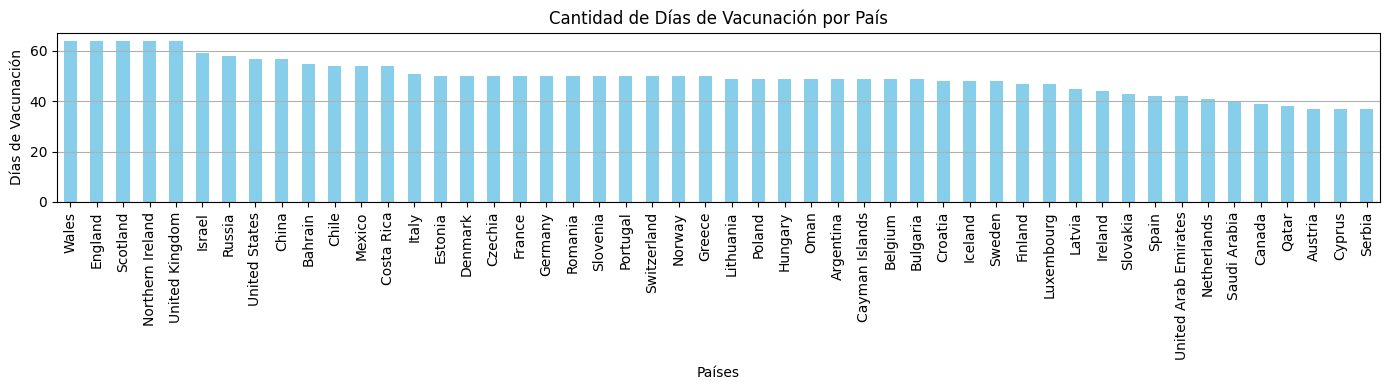

In [16]:
# Gráfico de barras
plt.figure(figsize=(14, 4))
n_dias_vacunacion.head(50).plot(kind='bar', color='skyblue')
plt.title('Cantidad de Días de Vacunación por País')
plt.xlabel('Países')
plt.ylabel('Días de Vacunación')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Una vez tenemos los 5 paises, que más días han vacunado, vamos a ver sus evoluciones en el tiempo:

<ipython-input-17-8c926e7a97ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top5['date'] = pd.to_datetime(data_top5['date'])


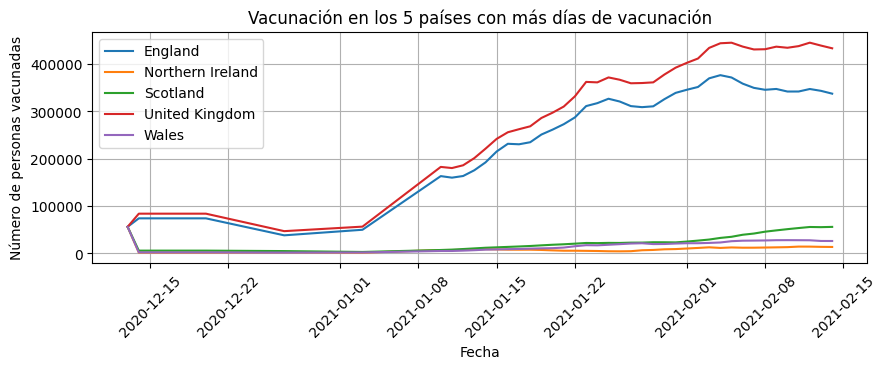

In [17]:
# Importar la librería matplotlib.pyplot
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
data_top5['date'] = pd.to_datetime(data_top5['date'])

# Graficamos la evolución de las vacunaciones en función de la fecha
plt.figure(figsize=(10, 3))
for pais in top5_paises:
    datos_pais = data_top5[data_top5['country'] == pais]
    plt.plot(datos_pais['date'], datos_pais['daily_vaccinations'], label=pais)

plt.title('Vacunación en los 5 países con más días de vacunación')
plt.xlabel('Fecha')
plt.ylabel('Número de personas vacunadas')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Para analizar el número de vacunaciones diarias de los 5 primeros países, hemos utilizado un gráfico de líneas que nos permite ver la evolución en el tiempo del número de vacunaciones díarias.

Este gráfico es muy útil, ya uqe muestra de forma muy visual como cambian estas variables en el tiempo,

Si tenemeos en cuenta que el mejor plan de vacunación es que ha sido más constante a lo largo del tiempo, podemos observar que **North Irland** ha sido el país con mayor constancia.

Sin embargo, **United Kingdom** ha aumentado el número de vacunaciones a lo largo del tiempo, consiguiendo así un mayor número total de personas vacunadas, lo que nos parece un mejor plan para combatir el COVID-19.

> ## **Práctica 2**

Cargamos la base de datos, así como algunas librerías que necesitaremos, y mostramos la base de datos por pantalla, para empezar a evaluarla y comprenderla.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

# Especificamos la ruta del archivo CSV en Drive
ruta_archivo_drive = '/content/drive/MyDrive/ozone.csv'

# Sacamos los nombres de las columnas
with open(ruta_archivo_drive, 'r') as file:
    column_names = file.readline().strip().split(',')

# Elimina las comillas de los nombres de las columnas
column_names = [name.replace('"', '') for name in column_names]

# Cargamos el archivo CSV en un DataFrame de pandas
dataOzone = pd.read_csv(ruta_archivo_drive, delimiter=',', skiprows=1, header=None, names=column_names)
print(dataOzone.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0      1             5            1           5.34             5760   
1      1             6            2           5.77             5720   
2      1             7            3           3.69             5790   
3      1             8            4           3.89             5790   
4      1             9            5           5.76             5700   

   Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
0           3        51                    54                45.32   
1           4        69                    35                49.64   
2           6        19                    45                46.40   
3           3        25                    55                52.70   
4           3        73                    41                48.02   

   Inversion_base_heigh

> #### **Conociendo nuestra Base de datos:**

De nuevo, analizamos y estudiamos algunas características básicas de nuestro data-frame, que nos ayuden a comprender mejor la base con la que vamos a trabajar ... etc.

In [19]:
dataOzone

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,12,23,4,3.21,5680,4,57,47,45.32,508,-10,58.64,100
199,12,27,1,1.74,5730,3,53,51,49.28,111,-14,72.50,200
200,12,28,2,2.69,5690,3,23,51,49.28,5000,-36,51.26,70
201,12,29,3,5.05,5650,3,61,50,46.58,3704,18,46.94,40


In [20]:
num_filas, num_columnas = dataOzone.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 203
Número de columnas: 13


In [21]:
print("Forma del DataFrame:",dataOzone.shape)
print("Tipos de nuestras variables:",dataOzone.dtypes.unique())

Forma del DataFrame: (203, 13)
Tipos de nuestras variables: [dtype('int64') dtype('float64')]


En este caso todas las variables son numéricas, aunque algunas de ellas son número enteros mientras que otras serán de tipo float.

Contamos con 203 registros de 13 variables diferentes, cada uno de ellos tomado en un día distinto, en la Universidad Francisco de Vitoria.

Podemos saber la velocidad del viento ese día, la presión atmosférica, la visibilidad, la cantidad de ozono máxima durante una hora a lo largo del día, o la temperatura.

Puesto que tenemos dos varibles que miden la Temperatura, ambas en grados, vamos a estudiar antes de comenzar si estas son muy distintas, ya que sería raro que variase demasiado la temperatura dentro de la Universidad:

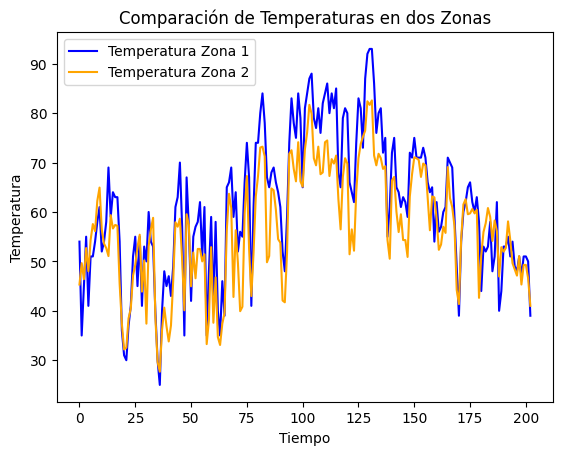

In [22]:
plt.plot(dataOzone['Temperature_Sandburg'], label='Temperatura Zona 1', color='blue')
plt.plot(dataOzone['Temperature_ElMonte'], label='Temperatura Zona 2', color='orange')

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.title('Comparación de Temperaturas en dos Zonas')
plt.legend()

# Mostrar gráfico
plt.show()

Tal y como se observa en el gráfico, ambas variables tienen una evolución bastante similar, por lo que para continuar con el estudio de esta base, nos quedaremos solo con una de ellas.

In [23]:
dataOzone = dataOzone.drop(columns=['Temperature_Sandburg'])

### **1.- (0,75 puntos)**
**Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,
Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos
obtenidos en cada caso.**

Consideramos *Outliers* a aquellos puntos de datos que se desvían del resto de la distribución de datos en un conjunto, es decir son los datos que están muy por encima o por debajo de la media del conjunto de datos.

Para estudiar estos valores, en primer lugar, vamos a examinar las distribuciones de las variables de interés mediante sus gráficos de barras.

Con este análisis conseguiremos una representación gráfica de la distribución de cada una de estas variables, lo que nos puede ayudar a ver mejor la cohesión o dispersión de los valores en cada variable, y así obtener una primera idea sobre la posible existencia de outliers en cada una de las variables.



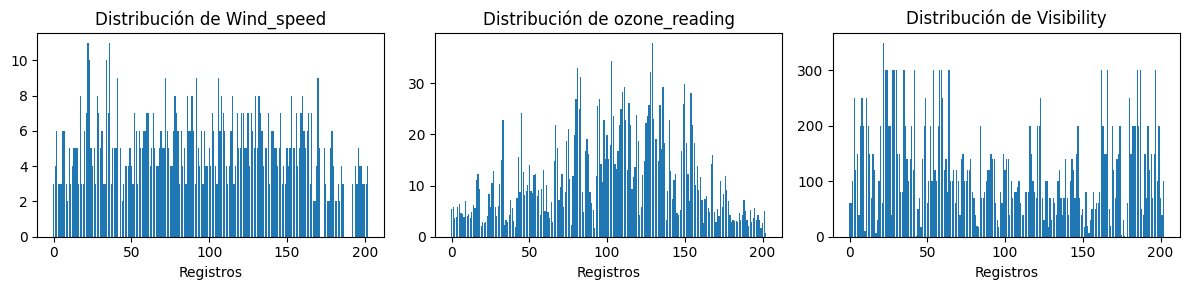

In [24]:
import matplotlib.pyplot as plt

# Creamos una figura y los 3 gráficos de las 3 variables que queremos estudiar
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Recorremos cada variable y la graficamos
for i, variable in enumerate(['Wind_speed', 'ozone_reading', 'Visibility']):
    axs[i].bar(range(len(dataOzone[variable])), dataOzone[variable])
    axs[i].set_xlabel('Registros')
    axs[i].set_title(f'Distribución de {variable}')

# Ajustamos el diseño y mostramos la figura
plt.tight_layout()
plt.show()

Se observa que la mayoría de los valores se concentran en un mismo rango en cada una de las variables estudiadas, aunque quizá en la variable velocidad del viento hay mayor uniformidad que en visibilidad y ozone.

No obstante, estas gráficas nos han ayudado a comprender mejor como se distribuyen estas variables, pero no nos permiten sacar conclusiones sobre los outliers.

#### **Boxplot**

Para ello, vamos a utilizar el **Diagrama de Cajas**, tambien conocido como Diagrama de Bigotes, o Boxplot, que es la manera más conveniente de analizar los outliers de forma visual.

A partir de estos diagramas de cajas, sacaremos conclusiones sobre la existencia, o no existencia de valores atípicos en estas variables:

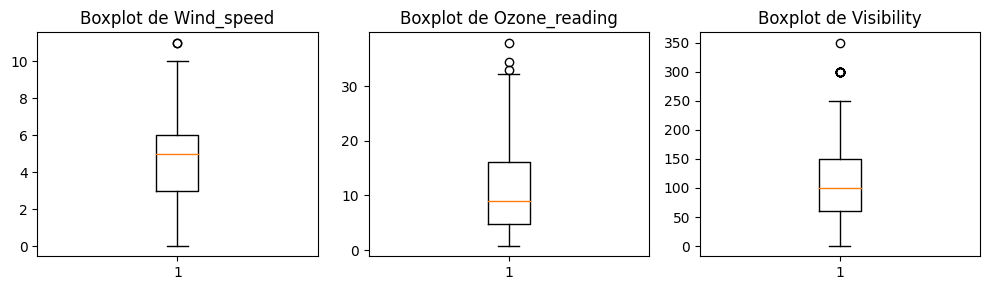

In [25]:
import matplotlib.pyplot as plt

# Crear una figura con subplots para los tres diagramas de bigotes
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Diagrama de bigotes para Wind_speed
axes[0].boxplot(dataOzone['Wind_speed'])
axes[0].set_title('Boxplot de Wind_speed')

# Diagrama de bigotes para Ozone_reading
axes[1].boxplot(dataOzone['ozone_reading'])
axes[1].set_title('Boxplot de Ozone_reading')

# Diagrama de bigotes para Visibility
axes[2].boxplot(dataOzone['Visibility'])
axes[2].set_title('Boxplot de Visibility')

plt.tight_layout()
plt.show()

Antes de continuar, debemos mencionar que investigando más sobre nuestro DataBase, hemos podido encontrar las unidades en las que vienen dadas las variables, ya que muchas de ellas estudiando su valor medio, podían estar medidas en distintas unidades de forma lógica.

Es por eso que hablaremos de visibilidad en millas, de velocidad del viento en mpg, y la medición de ozono, puesto que no aparecen especificaciones y analizando sus números, será en µg/m³  

In [26]:
# Ozone_reading:
print("\nOzone_reading")
print('min:',min(dataOzone['ozone_reading']))
print('max',max(dataOzone['ozone_reading']))
print('mean',dataOzone['ozone_reading'].mean())



Ozone_reading
min: 0.72
max 37.98
mean 11.373990147783251


 > #### **Analizamos de los Diagramas de Cajas**

**Wind_speed:** En primer lugar, analizamos el tamaño de los bigotes, que nos permiten afirmar que hay una mayor dispersión, es decir una mayor variabilidad en las velocidades desde 6 hasta 10 km/h. Tambien nos permiten afirmar que los valores típicos de la velocidad del viento están entre límites 0 km/h y 10 km/h.

La mediana, representada por la línea naranja, se encuentra ligeramente hacia la parte superior de la caja, y esto nos dice que el valor medio es 5km/h (segundo cuartil), y que existe una asimetría en la distribución, es decir que se han recogido mas valores entre 0 y 5 km/h.

Finalmente, observamos un único valor atípico para esta variable, el valor 11 > 10, y que se considerará outlier.



**Ozone_reading:** Hacemos un análisis parecido al de Wind_speed, pero para el nivel de ozono.

El 50 % de los registros del nivel de ozono, se encuentran aproximadamente entre 5 y 16 µg/m³, es decir esán en un rango de unos 11 µg/m³ (Iqr = 16 -5 = 11)

Por otra parte, la mediana tiene un valor de casi 10 µg/m³, y esto nos permite saber que los valores entre el 50% y el 75% están mas dispersos, que los valores entre el 25 y 50%.

Además el bigote superior es bastante más grande que el inferior, es decir los valores típicos a partir del 75% están más dispersos que los valores típicos inferioires al 25%.
Finalmente, y siguiendo esta lógica, vemos que existe alguna outlier por la parte superior, en valores entre 32 y 37, que luego calcularemos numéricamente.

Finalmente, podemos concluir que los días con niveles de ozono bajo son mucho más comunes que los días con un gran nivel de ozono.

**Visibility:** en la variable de visibilidad, vemos varios valores atípicos, uno de ellos esta en 350 metros, y el segundo en 300 metros, el cual se repite varias veces.

Sin embargo la mayor densidad de valores se encuentran entre 50 y 150 metros, con una mediana de valor un poco inferior a 100, por lo que la dispersion es similar en todos los valores entre 50-150 metros.

También podemos ver que hay una mayor concentración de valores en el 25% de valores típicos menores, frente al 25% de valores típicos mayores, aunque la diferencia es poco significativa. (asimetría superioir mínima).

Esto nos lleva a afirmar que los valores típicos de visibilidad están entre 0 y 250 metros, con un mayor número de registros de visibilidad más baja, aunque sin una gran diferencia.

 > #### **Obtención de OUTLIERS de forma numérica**


Ya hemos comprobado de forma gráfica que nuestras 3 variables continen algunos outliers entre sus valores.

A continuación, vamos a encontrar los
valores de estos outliers, calculando los cuartiles de nuestras variables, sus IQR, y sus limites, para estudiar que valores se salen de dichos límites, y por tanto se considera valores atípicos:

Calculamos los **cuartiles** para cada una de nuestras variabels, y los mostramos:

In [27]:
q1 = []
q2 = []
q3 = []

# Recorremos cada variable
for variable in (['Wind_speed', 'ozone_reading', 'Visibility']):
    q1.append(dataOzone[variable].quantile(0.25))
    q2.append(dataOzone[variable].quantile(0.50))
    q3.append(dataOzone[variable].quantile(0.75))

variables = ['Wind_speed', 'ozone_reading', 'Visibility']

# Mostramos los cuartiles
print("\nCUARTILES")
print("Variable\tQ1\tQ2\tQ3")
for i, variable in enumerate(variables):
    print(f"{variable}\t{q1[i]}\t{q2[i]}\t{q3[i]}")


CUARTILES
Variable	Q1	Q2	Q3
Wind_speed	3.0	5.0	6.0
ozone_reading	4.77	8.9	16.075
Visibility	60.0	100.0	150.0


El siguiente paso será obtener el **IQR** de cada una, es decir la difernecia entre el 3º y 1º cuartil, y que representa el rango en el que se encuentran el 50% de los valores

In [28]:
IQR = []
for i, variable in enumerate(['Wind_speed', 'ozone_reading', 'Visibility']):
    IQR.append(q3[i]-q1[i])

# Mostramos los valores de IQR para cada variable
print("\n")
print("IQR")
print("Variable\tIQR")
for variable, iqr in zip(variables, IQR):
    print(f"{variable}\t{iqr}")



IQR
Variable	IQR
Wind_speed	3.0
ozone_reading	11.305
Visibility	90.0


Y finalmente obtenemos los **outliers**, estudiando su posición frente a los límites superior e inferior, que delimitan el rango de valores típicos:

In [29]:
# Calculamos los LÍMITES, SUPERIOR E INFERIORR:
limite_superior = []
limite_inferior = []

for i, variable in enumerate(['Wind_speed', 'ozone_reading', 'Visibility']):
    limite_inferior.append(q1[i] - 1.5 * IQR[i])
    limite_superior.append(q3[i] + 1.5 * IQR[i])


# Finalmente, una vez tenemos los limites, calculamos los OUTLIERS:
outliers_wind = dataOzone[(dataOzone['Wind_speed'] < limite_inferior[0]) | (dataOzone['Wind_speed'] > limite_superior[0])]['Wind_speed']
outliers_ozone = dataOzone[(dataOzone['ozone_reading'] < limite_inferior[1]) | (dataOzone['ozone_reading'] > limite_superior[1])]['ozone_reading']
outliers_visibility = dataOzone[(dataOzone['Visibility'] < limite_inferior[2]) | (dataOzone['Visibility'] > limite_superior[2])]['Visibility']

#Mostramos por pantalla los outliers
print("\n")
print("OUTLIERS")
print("Variable\tOutliers")
print("Wind_speed\t" + ", ".join(map(str, outliers_wind.unique())))
print("ozone_reading\t" + ", ".join(map(str, outliers_ozone.unique())))
print("Visibility\t" + ", ".join(map(str, outliers_visibility.unique())))



OUTLIERS
Variable	Outliers
Wind_speed	11
ozone_reading	33.04, 34.39, 37.98
Visibility	350, 300


### **2.- (0,75 puntos)**
 **Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y
“Visibility”.**

 > #### **Intersección de outliers**



In [30]:
interseccion = dataOzone[dataOzone.index.isin(outliers_wind.index) & dataOzone.index.isin(outliers_visibility.index)]
print("INTERSECCIÓN de outliers en wind_speed y visibility:\n")
subconjunto_interseccion = dataOzone.iloc[interseccion.index]
subconjunto_interseccion

INTERSECCIÓN de outliers en wind_speed y visibility:



,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
22,2,9,1,2.92,5490,11,72,38.48,5000,32,38.12,350


 > #### **Unión de outliers**

In [31]:
union = dataOzone[dataOzone.index.isin(outliers_wind.index) | dataOzone.index.isin(outliers_visibility.index)]

print("UNIÓN de outliers en wind_speed y visibility:\n")
subconjunto_union = dataOzone.iloc[union.index]
subconjunto_union

UNIÓN de outliers en wind_speed y visibility:



,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
22,2,9,1,2.92,5490,11,72,38.48,5000,32,38.12,350
23,2,10,2,4.08,5560,10,72,40.46,5000,-1,37.58,300
24,2,12,4,8.32,5680,5,50,47.12,5000,-8,45.50,300
28,2,20,5,5.73,5690,8,21,43.88,5000,-30,42.26,300
29,2,23,1,4.04,5690,7,19,50.18,5000,7,49.10,300
30,2,24,2,6.04,5640,5,68,37.40,5000,24,42.08,300
35,3,2,2,3.22,5470,7,46,29.66,5000,44,29.30,300
36,3,3,3,2.79,5320,11,45,27.68,5000,39,27.50,200
42,3,12,5,7.63,5690,0,60,46.04,613,-27,59.72,300
54,3,31,3,12.33,5710,3,46,52.52,472,34,62.96,300


 > #### **Análisis gráfico**

 Vamos a utilizar este ejercicio, para analizar si los días que hay outliers en alguna de las dos variables estudiadas (----), el resto de variables varían mucho, respecto a los días sin outliers:

Para ello, calculamos el valor medio de las diferentes variables, los días que hay outliers en alguna de las variables: visibilidad o velocidad del viento, así como los días que no hay outliers ambas a la vez.







 que hay outliers en ambas, visibilidad y velocidad del viento, así como los días que no hay outliers en ninguna de las dos.

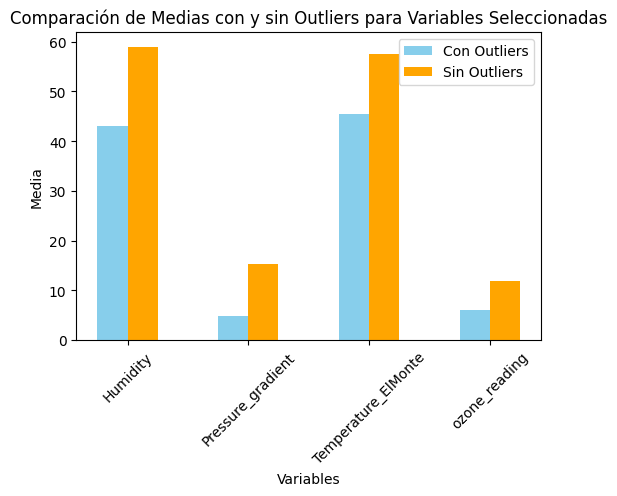

In [32]:
variables = ['Humidity', 'Pressure_gradient', 'Temperature_ElMonte', 'ozone_reading']

media_con_union = [dataOzone.loc[subconjunto_union.index, var].mean() for var in variables]
media_sin_union = [dataOzone.drop(subconjunto_union.index)[var].mean() for var in variables]

# #GRAFICAMOS:
fig, ax = plt.subplots(figsize=(6, 4))
x = range(len(variables))
bar_width = 0.25

bars_con_outliers = ax.bar(x, media_con_union, bar_width, label='Con Outliers', color='skyblue')
bars_sin_outliers = ax.bar([i + bar_width for i in x], media_sin_union, bar_width, label='Sin Outliers', color='orange')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Variables')
ax.set_ylabel('Media')
ax.set_title('Comparación de Medias con y sin Outliers para Variables Seleccionadas')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(variables, rotation=45)
ax.legend()

plt.show()

Teniendo en cuenta que los outliers en las 2 variables son outliers que se salen de los valores típicos por encima, estos representan una alta visibilidad y fuertes velocidades del viento.

Pues bien cuando se da alguno de estos valores podemos destacar que la humedad es más baja, y la temperatura y presión también son ligeramente más bajas que el resto de los días.

En cuanto a esta conclusión no encontramos un sentido demasiado lógico a lo que ocurre, y esto se debe a que los datos no son realmente representativos, pues los outiliers aparecen muy pocos días, esto no es representativo frente a todos los demás días de estudio.

### **3.- (1 punto)**
 **Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan
relacionar diferentes variables ¿Qué nos dicen los datos?**

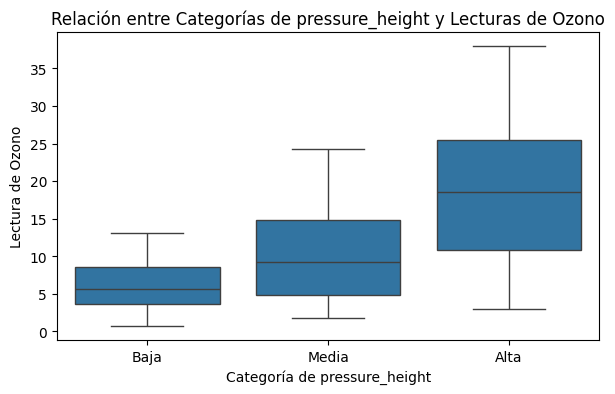

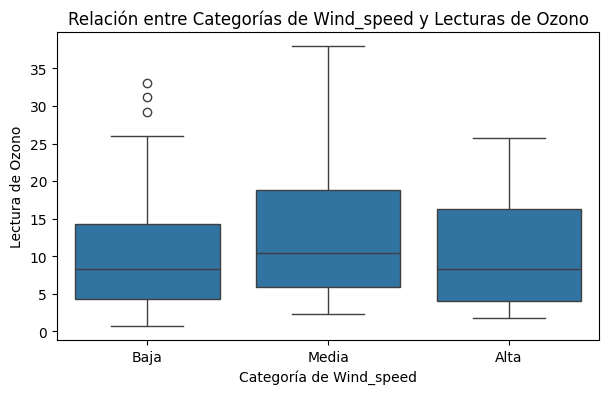

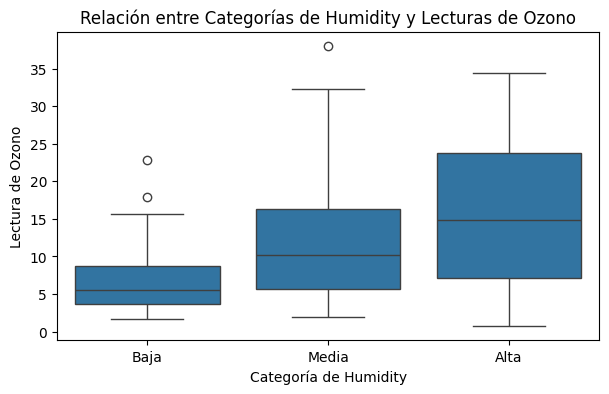

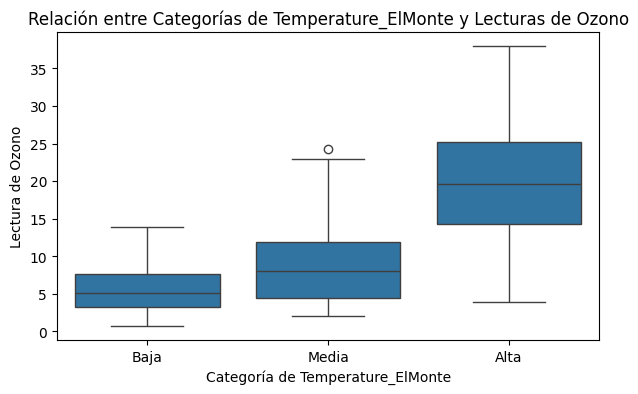

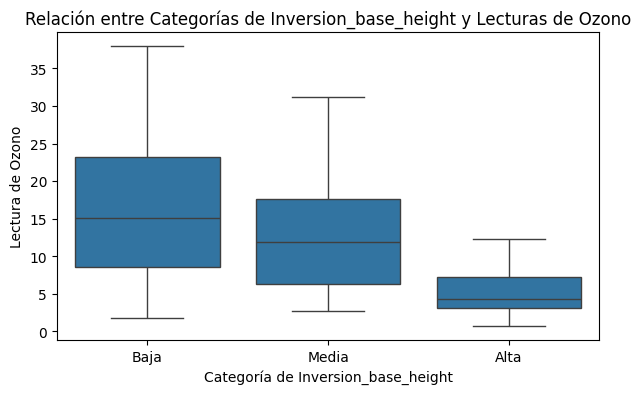

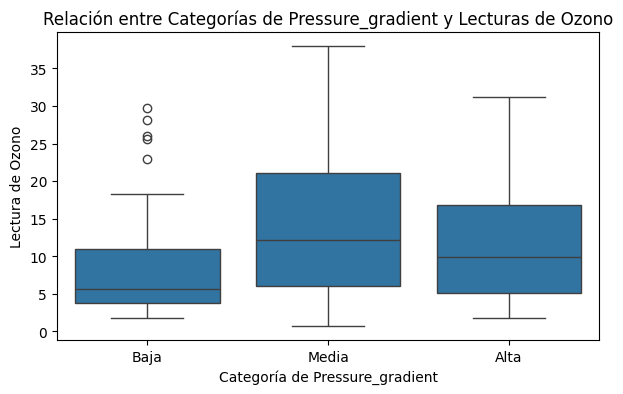

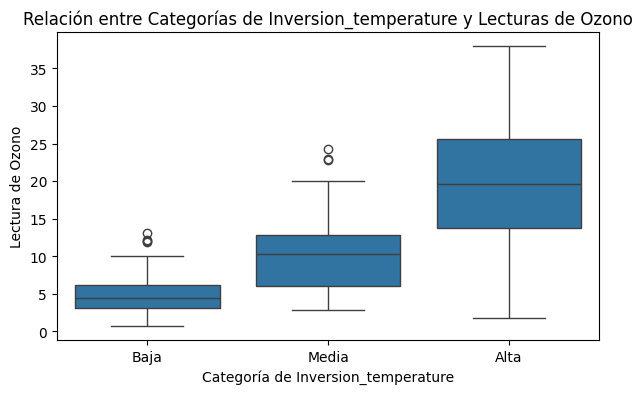

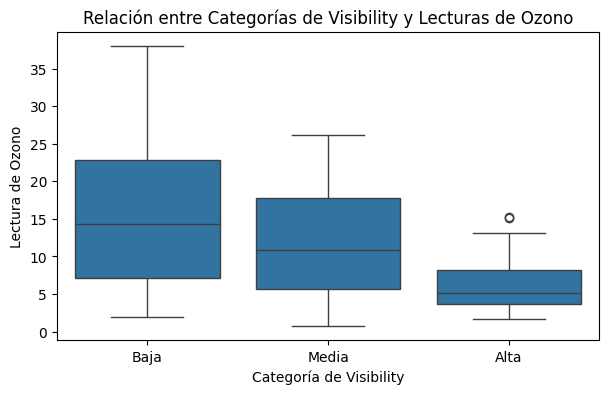

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Lista de variables numéricas relevantes para categorizar
variables_to_categorize = [
    'pressure_height', 'Wind_speed', 'Humidity', 'Temperature_ElMonte',
    'Inversion_base_height', 'Pressure_gradient', 'Inversion_temperature',
    'Visibility'
]

# Categorizando cada variable y generando un gráfico de boxplot
for variable in variables_to_categorize:
    # Categorización en tres grupos: Baja, Media, Alta
    dataOzone[f'{variable}_category'] = pd.qcut(dataOzone[variable], 3, labels=["Baja", "Media", "Alta"])

    # Generación de gráfico de boxplot
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=f'{variable}_category', y='ozone_reading', data=dataOzone)
    plt.title(f'Relación entre Categorías de {variable} y Lecturas de Ozono')
    plt.xlabel(f'Categoría de {variable}')
    plt.ylabel('Lectura de Ozono')
    plt.show()
    print('\n')


Humidity (Humedad): No hay una tendencia clara que indique un impacto significativo de la humedad sobre las lecturas de ozono, aunque las categorías Media y Alta muestran una mayor variabilidad.

Temperature_ElMonte (Temperatura): Las temperaturas más altas están asociadas con lecturas más elevadas de ozono, lo que sugiere una relación positiva entre la temperatura y las concentraciones de ozono.

Inversion_base_height (Altura de la Base de Inversión): Las lecturas de ozono tienden a ser más bajas cuando la altura de la base de inversión es alta, lo que indica que las condiciones de inversión más fuertes podrían limitar la dispersión de ozono.

Pressure_gradient (Gradiente de Presión): No muestra una relación clara y consistente con las lecturas de ozono, reflejando una influencia variada o posiblemente otros factores predominantes.

Inversion_temperature (Temperatura de Inversión): Las categorías más altas muestran lecturas más elevadas de ozono, sugiriendo que temperaturas de inversión más altas pueden estar asociadas con una mayor concentración de ozono.

Wind_speed (velocidad del viento): Las categorías de velocidad del viento (Baja, Media, Alta) tienen un impacto limitado en las lecturas de ozono, mostrando variaciones menores entre ellas. Aunque hay algunos valores atípicos en la categoría Baja, la relación entre la velocidad del viento y las lecturas de ozono no parece ser fuertemente marcada.

Visibility (Visibilidad): La visibilidad baja se asocia con lecturas más altas de ozono, lo que podría indicar una acumulación de contaminantes, incluido el ozono, bajo condiciones de visibilidad reducida.


pressure_height (Altura de Presión): Las categorías más altas están asociadas con lecturas más elevadas de ozono, lo que podría reflejar el impacto de la presión atmosférica en la concentración de ozono.

### **4.- (1 punto)**
 Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.


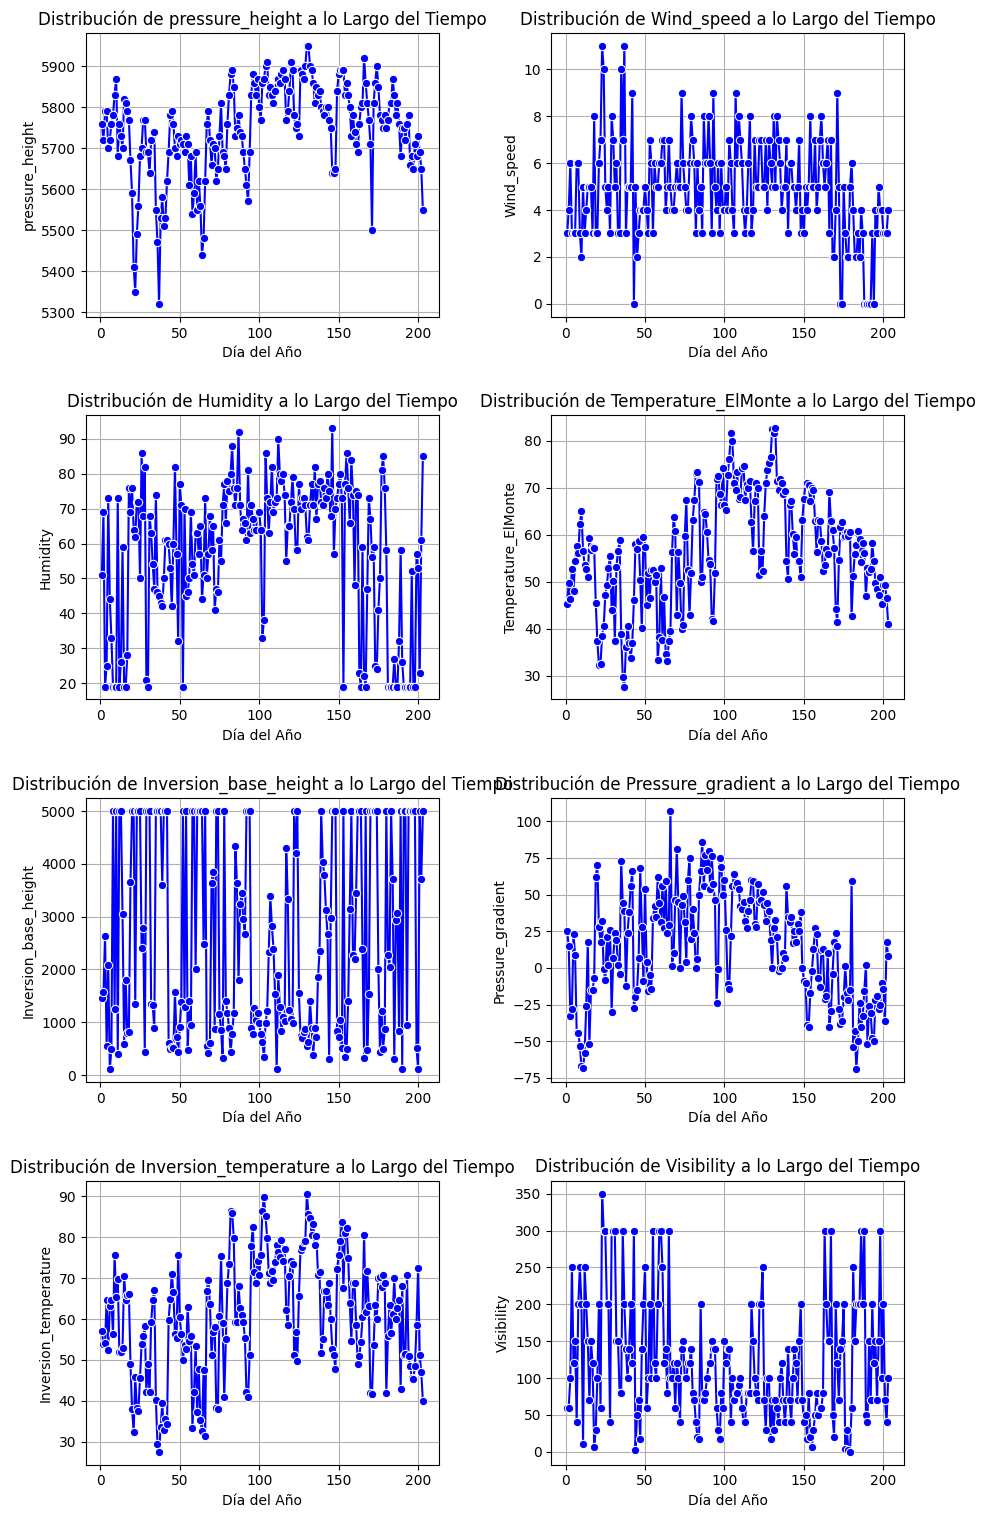

In [34]:
# Agregar una columna 'Day' para representar el día consecutivo del año
dataOzone['Day'] = range(1, len(dataOzone) + 1)


# Crear una figura con subgráficos
n_rows = len(variables_to_categorize) // 2 + len(variables_to_categorize) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows * 4))  # Ajustar el tamaño según el número de variables
fig.tight_layout(pad=5.0)

# Llenar cada subgráfico con una variable
for i, variable in enumerate(variables_to_categorize):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Day', y=variable, data=dataOzone, ax=axs[row, col], marker='o', linestyle='-', color='blue')
    axs[row, col].set_title(f'Distribución de {variable} a lo Largo del Tiempo')
    axs[row, col].set_xlabel('Día del Año')
    axs[row, col].set_ylabel(variable)
    axs[row, col].grid(True)

# Ajustar para casos donde hay un número impar de variables
if len(variables_to_categorize) % 2 != 0:
    fig.delaxes(axs[n_rows - 1, 1])  # Eliminar el último subgráfico si está vacío

plt.show()


Analizando las cuatro variables clave para la calidad del aire y su variabilidad temporal, se eligen: **lecturas de ozono, temperatura en Monte, altura de la base de inversión y visibilidad.**


Estas variables muestran variabilidad y picos significativos relacionados con factores climáticos, indicando su impacto en la calidad del aire y la salud pública.

La temperatura y la altura de inversión reflejan patrones estacionales y condiciones de estancamiento del aire, respectivamente, mientras que la visibilidad varía con la concentración de contaminantes.

La representación más útil es a través de gráficos de series temporales, que destacan la evolución temporal de cada variable, permitiendo comparar tendencias y detectar eventos críticos, ofreciendo así una comprensión profunda de su comportamiento y relevancia ambiental.







># PRÁCTICA 3 ( Reducción de dimensionalidad )  

**Carga de la Base de Datos:**

In [35]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Especifica la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/USA.xlsx'

# Carga el archivo CSV en un DataFrame de pandas
dataUSA = pd.read_excel( ruta_archivo_drive )


# Muestra las primeras filas del DataFrame para verificar que los datos se hayan cargado correctamente
print(dataUSA.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
0        Phoenix  10.0      70.3     213.0      582.0     6.0    7.05   36.0
1    Little Rock  13.0      61.0      91.0      132.0     8.2   48.52  100.0
2  San Francisco  12.0      56.7     453.0      716.0     8.7   20.66   67.0
3         Denver  17.0      51.9     454.0      515.0     9.0   12.95   86.0
4       Hartford  56.0      49.1     412.0      158.0     9.0   43.37  127.0


Información sobre las variables:


*   **SO2** : Indica el contenido de dióxido de azufre en el aire (partes por millón)
*   **Neg.Temp** : Representa la temperatura media anual en grados Fahrenheit.
*   **Empresas** : Cuantifica el número de empresas mayores de 20 trabajadores en cada ciudad
* **Población** : Muestra la población total de la ciudad en miles de habitantes.
* **Viento** : Describe la velocidad media del viento de la ciudad en millas por hora.
* **Precip** : Indica la precipitación anual total en pulgadas.
* **Días** : Refleja el número de días lluviosos al año en cada ciudad.



> #### **Conociendo nuestra Base de datos:**

A continuación, y por última vez, analizamos y estudiamos algunas características básicas de nuestro data-frame, como puede ser tamaño, forma de las variables ... etc.

In [36]:
num_filas, num_columnas = dataUSA.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 41
Número de columnas: 8


In [37]:
print("Forma del DataFrame:",dataUSA.shape)
print("Tipos de nuestras variables:",dataUSA.dtypes.unique())

Forma del DataFrame: (41, 8)
Tipos de nuestras variables: [dtype('O') dtype('float64')]


Nuestro DataFrame tiene 41 filas y 8 columnas, es decir, que tenemos 41 ciudades y, cada una de estas ciudades, tiene datos relacionados con 8 variables diferentes.

En cuanto al tipo de variables encontramos dos tipos de datos: `O`, que indica objetos y `foat64 `, que indica números de punto flotante (decimales).

A continuación, vamos a entender mejor el DataFrame:

In [38]:
dataUSA.describe()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,55.763415,463.097561,608.609756,9.443902,36.769024,113.902439
std,23.472272,7.227716,563.473948,579.113023,1.428644,11.771550,26.506419
min,8.000000,43.500000,35.000000,71.000000,6.000000,7.050000,36.000000
25%,13.000000,50.600000,181.000000,299.000000,8.700000,30.960000,103.000000
50%,26.000000,54.600000,347.000000,515.000000,9.300000,38.740000,115.000000
75%,35.000000,59.300000,462.000000,717.000000,10.600000,43.110000,128.000000
max,110.000000,75.500000,3344.000000,3369.000000,12.700000,59.800000,166.000000


Estas estadísticas nos proporcionan una comprensión general de la distribución y la variabilidad de los datos en cada variable, lo que es fundamental para comprender las características del conjunto de datos y puede ser útil para análisis posteriores.

Despues de este análisis podemos sacar las siguientes conclusiones:
* No hay valores faltantes en los datos.
* La concentración media de dióxido de azufre (SO2) es de aproximadamente 30.05 partes por millón, con una desviación estándar de 23.47, lo que indica una variabilidad considerable entre las ciudades.
* La temperatura media negativa es de alrededor de 55.76 grados Fahrenheit, con una desviación estándar de 7.23.
* El número medio de empresas es de aproximadamente 463.10, con una desviación estándar de 563.47.
* La población media es de aproximadamente 608.61, con una desviación estándar de 579.11.
* La precipitación media es de aproximadamente 36.77 pulgadas, con una desviación estándar de 11.77.
* La velocidad media del viento es de aproximadamente 9.44 millas por hora, con una desviación estándar de 1.43.
* El número medio de días con precipitación es de aproximadamente 113.90, con una desviación estándar de 26.51.

### **1.- (1 punto)**
**Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango
no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de
la librería scikit-learn**

Lo primero que debemos hacer es estandarizar los datos, es decir, ajustarlos para que tengan una media de cero y una desviación estándar de uno, lo cual es importante ya que permite que las variables se puedan comparar de forma más precisa y que el análisis sea más fiable. Utilizaremos el método StandardScaler de scikit-learn para hacer esto.

In [39]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Comprobamos que todos los datos sean numéricos para poder trabajar con ellos.
dataUSA_numerico = dataUSA.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()

# Calculamos la media y desviación estandar de cada columna del conjunto.
scaler.fit(dataUSA_numerico)

# Aplicamos la transformarción para estandarizar los datos.
dataUSA_escalar = scaler.transform(dataUSA_numerico)

# Con los datos ya estandarizados volvemos a crear la Base de Datos
dataUSA_estandarizado = pd.DataFrame(dataUSA_escalar, columns=dataUSA_numerico.columns)

Vamos a crear la Matriz de correlación de los datos para verlos estandarizados:
$$
r_{XY} = \frac{{\sum (X_i - \bar{X})(Y_i - \bar{Y})}}{{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}}
$$

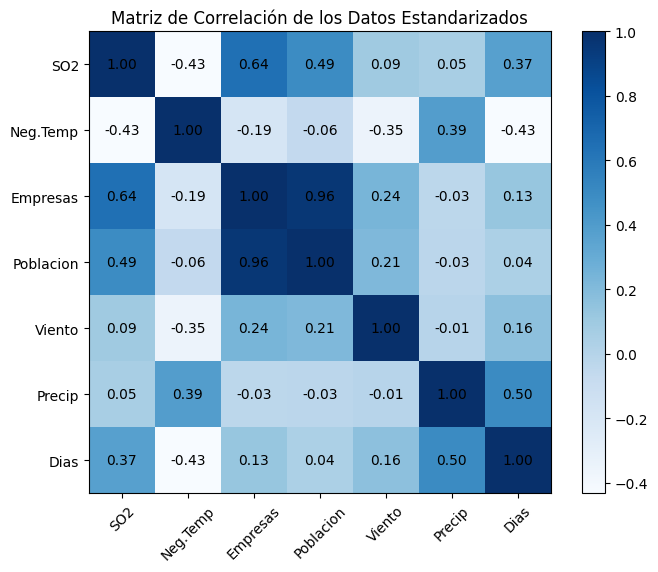

In [40]:
# Calcular la matriz de correlación
matriz_correlacion = dataUSA_estandarizado.corr()

# Gráfica
plt.figure(figsize=(8, 6))
plt.imshow(matriz_correlacion, cmap='Blues', interpolation='nearest')
for i in range(len(matriz_correlacion)):
    for j in range(len(matriz_correlacion)):
        plt.text(j, i, f'{matriz_correlacion.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.colorbar()
plt.title('Matriz de Correlación de los Datos Estandarizados')
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=45)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.show()

Para saber si hemos estandarizado bien los datos, comprobamos que tienen media = 0 y desviación típica = 1:

In [41]:
media = dataUSA_estandarizado.mean()
desviacion_tipica = dataUSA_estandarizado.std()
print("Media de los datos estandarizados:")
print(round(media))
print("\nDesviación típica de los datos estandarizados:")
print(round(desviacion_tipica))

Media de los datos estandarizados:
SO2          0.0
Neg.Temp     0.0
Empresas    -0.0
Poblacion   -0.0
Viento       0.0
Precip       0.0
Dias        -0.0
dtype: float64

Desviación típica de los datos estandarizados:
SO2          1.0
Neg.Temp     1.0
Empresas     1.0
Poblacion    1.0
Viento       1.0
Precip       1.0
Dias         1.0
dtype: float64


### **2.- (1 punto)**
 **El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y
los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para
representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza
mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de
NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica
qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información
representamos con 3 componentes?**

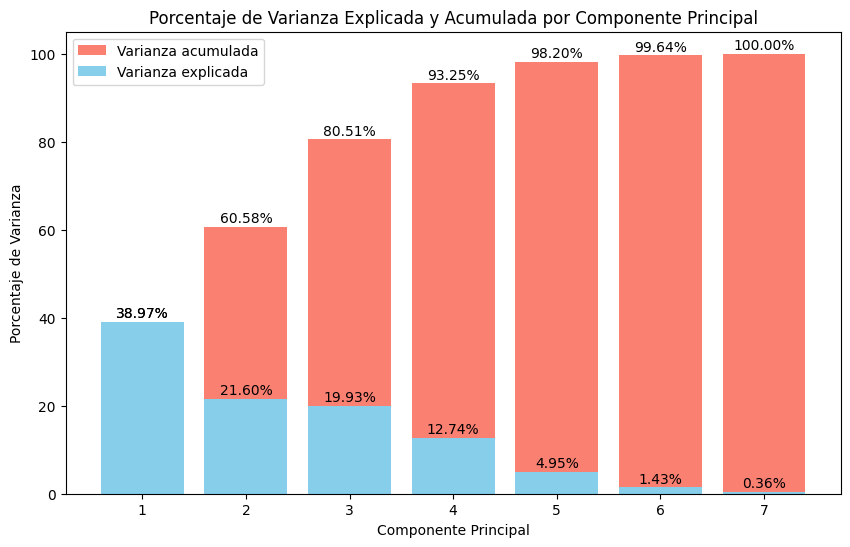

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculamos la matriz de covarianza.
matriz_covarianza = np.cov(dataUSA_estandarizado, rowvar=False)

# Calculamos los autovalores y autovectores de la matriz de covarianza.
autovalores, autovectores = np.linalg.eig(matriz_covarianza)

# Ordenamos los autovalores y autovectores de mayor a menor
indices_ord = np.argsort(autovalores)[::-1]
autovalores = autovalores[indices_ord]
autovectores = autovectores[:, indices_ord]

# Calculamos el porcentaje de varianza de cada componente.
porcentaje_varianza = autovalores / np.sum(autovalores)


# Calcular el porcentaje acumulado de varianza explicada
varianza_acumulada = np.cumsum(porcentaje_varianza)

# Creamos un DataFrame con el porcentaje de varianza y el acumulado por cada componente.
componentes_data = pd.DataFrame({
    'Componente': np.arange(1, len(porcentaje_varianza) + 1),
    'Varianza': porcentaje_varianza,
    'Varianza Acumulada': varianza_acumulada})

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la varianza explicada y la varianza acumulada como barras
ax.bar(componentes_data['Componente'], componentes_data['Varianza Acumulada']*100, color='salmon', label='Varianza acumulada')
ax.bar(componentes_data['Componente'], componentes_data['Varianza']*100, color='skyblue', label='Varianza explicada')

# Etiquetas y título
ax.set_xlabel('Componente Principal')
ax.set_ylabel('Porcentaje de Varianza')
ax.set_title('Porcentaje de Varianza Explicada y Acumulada por Componente Principal')
ax.legend()

# Mostrar el valor de porcentaje encima de cada barra
for i, varianza in enumerate(componentes_data['Varianza']*100):
    ax.text(componentes_data['Componente'][i], varianza + 1, f'{varianza:.2f}%', ha='center')

# Mostrar el valor de porcentaje encima de cada barra (Varianza acumulada)
for i, varianza_acumulada in enumerate(componentes_data['Varianza Acumulada']*100):
    ax.text(componentes_data['Componente'][i], varianza_acumulada + 1, f'{varianza_acumulada:.2f}%', ha='center')

# Mostrar la gráfica
plt.show()

La gráfica nos muestra el porcentaje de varianza explicada y la varianza acumulada por cada componente principal. En el eje X observamos los componentes principales y en el eje Y el porcentaje de varianza.

Los distintos colores que vemos en las barras de cada componente principal representan el porcentaje de varianza explicada por el componente principal (azul) y el porcentaje de varianza acumulada hasta el componente principal (rojo).

**2 COMPONENTES**

En la gráfica podemos observar que los dos primeros componentes principales explican el 60.58% de la varianza de los datos. Lo que quiere decir que si usamos solo estos dos componentes, se conserva el 60.58% de la información original del conjunto de datos.

En cuanto a la pérdida de información con dos componentes, observamos que se pierde el 39.42% de la información original del conjunto de datos.

**3 COMPONENTES**

Si ahora cogemos 3 componentes, conservaríamos el 80.51% de la información original y perderíamos el 19.49% de esta.



In [43]:
# Calcular la información perdida con 2 componentes
informacion_perdida_2_componentes = 1 - componentes_data['Varianza Acumulada'][1]
# Calcular la información representada con 3 componentes
informacion_representada_3_componentes = componentes_data['Varianza Acumulada'][2]

# Mostrar los resultados
print("Información perdida con 2 componentes:", informacion_perdida_2_componentes * 100, "%")
print("Información representada con 3 componentes:", informacion_representada_3_componentes * 100, "%")

Información perdida con 2 componentes: 39.422078021988625 %
Información representada con 3 componentes: 80.50610753626253 %


### **3.- (1 punto)**
**Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando
los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y
comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria.
Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades
de forma aleatoria y explicar qué pasa con ellas.**

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Obtener el nombre de las variables de la primera fila de la base de datos
nombres_variables = dataUSA.columns[1:]

# Crear un DataFrame con los tres primeros autovectores, utilizando los nombres de las variables como índices
data_autovectores = pd.DataFrame(data=autovectores[:, :3],
                                 columns=['Componente 1', 'Componente 2', 'Componente 3'],
                                 index=nombres_variables)

# Mostrar el DataFrame con los autovectores
print("Primeros 3 vectores:")
print(data_autovectores)

Primeros 3 vectores:
           Componente 1  Componente 2  Componente 3
SO2            0.489699      0.084576     -0.014350
Neg.Temp      -0.315371     -0.088638     -0.677136
Empresas       0.541169     -0.225881     -0.267159
Poblacion      0.487588     -0.282004     -0.344838
Viento         0.249875      0.055471      0.311265
Precip         0.000187      0.625879     -0.492036
Dias           0.260179      0.677967      0.109579


**COMPONENTE 1:** Podemos ver que tienen influencia las variables: *SO2*, *Empresas* y *Población*. Tambíen podemos considerar que influyen de manera inversa la variable *Temperatura*.

⬆ *S02* , *Empresas* , *Población*

⬇ *Temperatura*

> Podemos conluclir que la **Componente 1** nos da información sobre a mayor población y mayores empresas, la ciudad tienen mayores valores de S02 (dióxido de azufre), es decir, mayor contaminación. También, sacamos la conclusión que estas ciudades tienen temperaturas más bajas.

**COMPONENTE 2:** Podemos ver que la variables con influcencia son: *Precipitaciones* y *Días*.

⬆ *Precipitaciones* , *Días*

> De la **Componente 2** podemos sacar la conclusión de que las ciudades con mayores precipitaciones también son las ciudades con mayores días de lluvia. Por lo que está componente nos dice las ciudades con un clima más húmedo.

**COMPONENTE 3:** Podemos ver que la variable con influencia es el *Viento*. Las variables : *Temperatura* y *Población*  influyen de manera inversa.

⬆ *Viento*

⬇ *Temperatura* , *Población*

> Podemos concluir que la **Componente 3** reunen a las ciudades donde hay mayor viento y con bajas temperaturas. Además, son ciudades poco pobladas.

vamos a usar la formula para llevar los datos a la primera componente:

**C1** = 0.489699 * X1 + -0.315371 * X2 + ... + 0.000187 * X6 + 0.260179 * X7  =  -2.715976

In [45]:
# Multiplicar los datos estandarizados por los autovectores para obtener las nuevas coordenadas
componentesPrincipales = np.dot(dataUSA_estandarizado, autovectores)
componentesPrincipales = componentesPrincipales[:,0:3]

data_componentesPrincipales = pd.DataFrame(data=componentesPrincipales,
                                           columns=['Componente 1', 'Componente 2', 'Componente 3'])

# Mostrar el DataFrame con los componentes principales
print("Datos llevados a las compoentes:")
print(data_componentesPrincipales.head())

Datos llevados a las compoentes:
   Componente 1  Componente 2  Componente 3
0     -2.715976     -3.891439     -1.058355
1     -1.717745      0.482420     -0.850043
2     -0.938965     -2.237246      0.183748
3     -0.549861     -1.971943      1.228596
4      0.460372      1.097335      0.589704


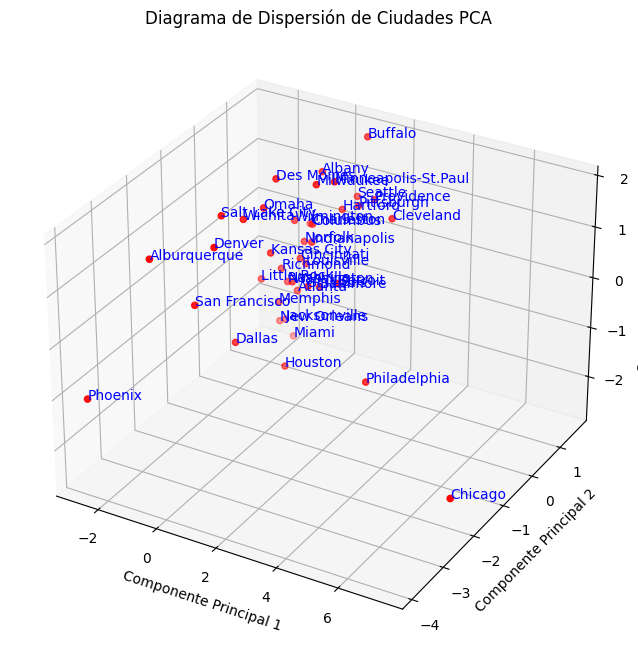

In [46]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(componentesPrincipales[:, 0], componentesPrincipales[:, 1], componentesPrincipales[:, 2], c='r', marker='o')

for i, ciudad in enumerate(dataUSA['Ciudad']):
    ax.text(componentesPrincipales[i, 0], componentesPrincipales[i, 1], componentesPrincipales[i, 2], ciudad, color='blue')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Diagrama de Dispersión de Ciudades PCA')

plt.show()

Desde este gráfico de dispersión en 3 dimensiones, es díficil poder sacar información de las ciudades.

Por ello, vamos a graficarlo en dos dimensiones desde las 3 perspectivas para poder desglosar la información.

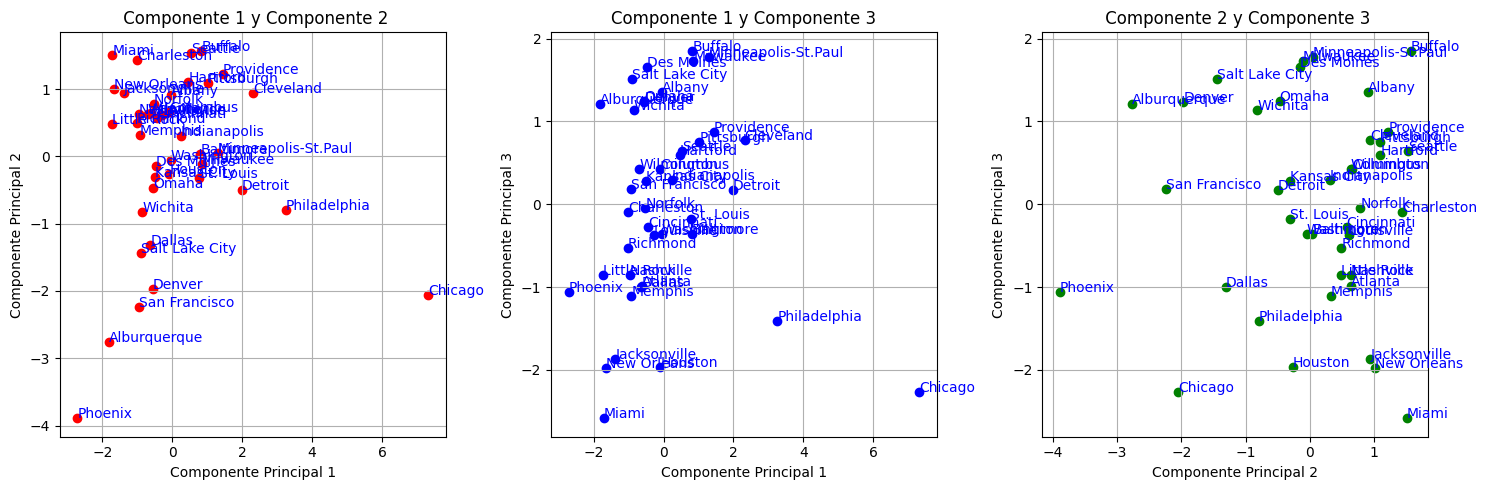

In [47]:
# Crear subplots en 2D
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para la relación entre Componente Principal 1 y Componente Principal 2
axs[0].scatter(componentesPrincipales[:, 0], componentesPrincipales[:, 1], c='r', marker='o')
axs[0].set_xlabel('Componente Principal 1')
axs[0].set_ylabel('Componente Principal 2')
axs[0].set_title(' Componente 1 y Componente 2')
axs[0].grid(True)

for i, ciudad in enumerate(dataUSA['Ciudad']):
    axs[0].text(componentesPrincipales[i, 0], componentesPrincipales[i, 1], ciudad, color='blue')

# Gráfico para la relación entre Componente Principal 1 y Componente Principal 3
axs[1].scatter(componentesPrincipales[:, 0], componentesPrincipales[:, 2], c='b', marker='o')
axs[1].set_xlabel('Componente Principal 1')
axs[1].set_ylabel('Componente Principal 3')
axs[1].set_title('Componente 1 y Componente 3')
axs[1].grid(True)

for i, ciudad in enumerate(dataUSA['Ciudad']):
    axs[1].text(componentesPrincipales[i, 0], componentesPrincipales[i, 2], ciudad, color='blue')

# Gráfico para la relación entre Componente Principal 2 y Componente Principal 3
axs[2].scatter(componentesPrincipales[:, 1], componentesPrincipales[:, 2], c='g', marker='o')
axs[2].set_xlabel('Componente Principal 2')
axs[2].set_ylabel('Componente Principal 3')
axs[2].set_title(' Componente 2 y Componente 3')
axs[2].grid(True)

for i, ciudad in enumerate(dataUSA['Ciudad']):
    axs[2].text(componentesPrincipales[i, 1], componentesPrincipales[i, 2], ciudad, color='blue')

# Mostrar los subplots
plt.tight_layout()
plt.show()


Observando las gráficas, podemos ver que la mayoría de las ciudades están cerca de del origen de coordendas, de estas podremos sacar poca información de relevancia. Por ello, estudiaremos ciudades alejadas del centro, para poder verificar la información que nos dicen los datos.

Ahora vamos elegir al menos 4 ciudades de forma aleatoria y explicar qué pasa con ellas.

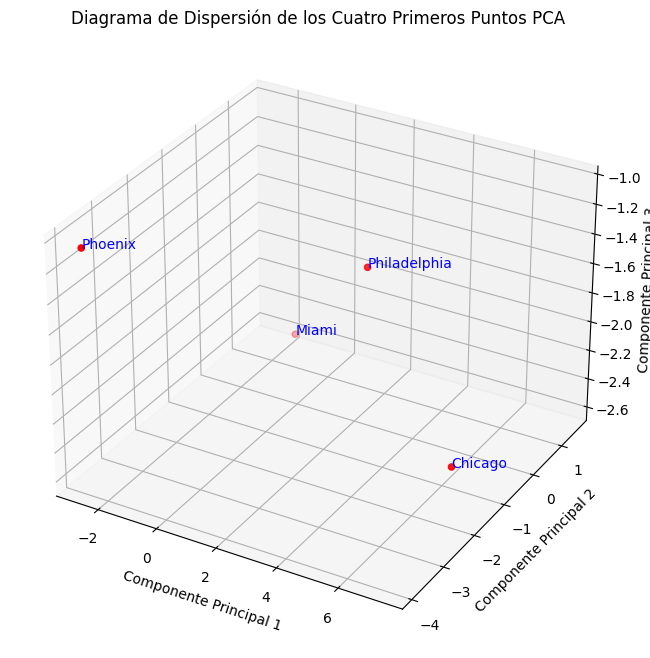

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


ciudadesAleatorias = [ dataUSA['Ciudad'][0], dataUSA['Ciudad'][10], dataUSA['Ciudad'][20], dataUSA['Ciudad'][24], dataUSA['Ciudad'][22]]


# Seleccionar solo los primeros cuatro puntos y sus respectivas etiquetas
coordenadasCiudades = componentesPrincipales[[0, 8, 10, 28]]
etiquetasCiudades = dataUSA['Ciudad'][[0, 8, 10, 28]]

# Crear una figura y los ejes 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot de los cuatro primeros puntos
ax.scatter(coordenadasCiudades[:, 0], coordenadasCiudades[:, 1], coordenadasCiudades[:, 2], c='r', marker='o')

# Etiquetar cada punto con el nombre de la ciudad
for i, ciudad in enumerate(etiquetasCiudades):
    ax.text(coordenadasCiudades[i, 0], coordenadasCiudades[i, 1], coordenadasCiudades[i, 2], ciudad, color='blue')

# Establecer etiquetas de los ejes y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Diagrama de Dispersión de los Cuatro Primeros Puntos PCA')

# Mostrar el gráfico
plt.show()


In [49]:
# Crear un DataFrame con el nombre de las ciudades y las tres primeras componentes principales
tabla_componentes = pd.DataFrame({
    'Ciudad': etiquetasCiudades,
    'Componente 1': coordenadasCiudades[:, 0],
    'Componente 2': coordenadasCiudades[:, 1],
    'Componente 3': coordenadasCiudades[:, 2]
})

# Mostrar la tabla
print(tabla_componentes)

          Ciudad  Componente 1  Componente 2  Componente 3
0        Phoenix     -2.715976     -3.891439     -1.058355
8          Miami     -1.715728      1.507995     -2.585263
10       Chicago      7.320800     -2.052442     -2.263394
28  Philadelphia      3.251064     -0.798819     -1.407061


Primero vamos a calcular las medias de todas las variables para poder comprobar si los resultados que nos dan concuerdan con los valores de las variables.

In [50]:
medias = dataUSA[['SO2', 'Neg.Temp', 'Empresas', 'Poblacion', 'Viento', 'Precip', 'Dias']].mean()
print(medias)

SO2           30.048780
Neg.Temp      55.763415
Empresas     463.097561
Poblacion    608.609756
Viento         9.443902
Precip        36.769024
Dias         113.902439
dtype: float64


In [51]:
fila_phoenix = dataUSA.loc[dataUSA['Ciudad'] == 'Phoenix']
print(fila_phoenix)

    Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip  Dias
0  Phoenix  10.0      70.3     213.0      582.0     6.0    7.05  36.0


**Phoenix:** Vemos que tiene valores negativos en las 3 comonentes. Sobre todo, en la componente 1 y 2. Lo que nos quiere decir que se trata de una Ciudad con poca población, pocas empresas y poca concetración de S02,. También podemos deducir que se trata de una ciudad con clima seco, de pocas precipitaciones y cálido.

> **SO2** : < 30  ✅

> **TEMPERATURA** : > 55 ✅

> **EMPRESAS** : < 463 ✅

> **POBLACIÓN** : < 608 ✅

> **PRECIPITACIONES** : < 36 ✅

> **DÍAS** : < 113 ✅





In [52]:
fila_Miami = dataUSA.loc[dataUSA['Ciudad'] == 'Miami']
print(fila_Miami)

  Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
8  Miami  10.0      75.5     207.0      335.0     9.0    59.8  128.0


**Miami:** Vemos que tiene valores negativos en las componentes 1 y 3, y positvos en la componente 2. Sin embargo, no muy significativos. Puede tratarse de una ciudad con poca población y pocas empresas, además de no tener mucha contaminación de S02. En cuanto a su clima, presentará temperaturas frías, bajas velocidades del viento y muchas precipitaciones.

> **SO2** : < 30  ✅

> **TEMPERATURA** : > 55  ✅

> **EMPRESAS** : < 463 ✅

> **POBLACIÓN** : < 608 ✅

> **VIENTO** : < 9.44 ✅

> **PRECIPITACIONES** : > 36 ✅

> **DÍAS** : > 113 ✅

In [53]:
fila_Chicago = dataUSA.loc[dataUSA['Ciudad'] == 'Chicago']
print(fila_Chicago)

     Ciudad    SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
10  Chicago  110.0      50.6    3344.0     3369.0    10.4   34.44  122.0


**Chicago:** Vemos que tiene valores positivos en las componentes 1, 2 y 3. Podemos deducir que se trata de una ciudad con una gran población y muchas empresas, también tiene una alta concentración de S02. En cuanto al clima, podemos vemos que tiene un clima húmedo con bajas precipitaciones , bajas temperaturas y poco viento

> **SO2** : > 30  ✅

> **TEMPERATURA** : < 55 ✅

> **EMPRESAS** : > 463 ✅

> **POBLACIÓN** : > 608 ✅

> **VIENTO** : < 9.44 ❌

> **PRECIPITACIONES** : < 36 ✅

> **DÍAS** : < 113 ❌ ( cerca del valor, 122 )

In [54]:
fila_Philadelphia = dataUSA.loc[dataUSA['Ciudad'] == 'Philadelphia']
print(fila_Philadelphia)

          Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
28  Philadelphia  69.0      54.6    1692.0     1950.0     9.6   39.93  115.0


**Philadelphia:** Vemos que tiene positiva la componente 1 y negativa la 3.Podemos deducir que se trata de una ciudad con una gran población y muchas empresas, también tiene una alta concentración de S02. En cuanto al clima, podemos decir que tiene temperaturas frías, altas precipitaciones y poco viento.


> **SO2** : > 30  ✅

> **TEMPERATURA** : < 55 ✅

> **EMPRESAS** : > 463 ✅

> **POBLACIÓN** : > 608 ✅

> **VIENTO** : < 9.44 ❌

> **PRECIPITACIONES** : > 36  ✅

> **DÍAS** : > 113 ✅

### **4.- (1 punto)**
 **Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara
los resultados y coméntalos.**

In [55]:
from sklearn.decomposition import PCA

# Crear una instancia de PCA con el número deseado de componentes
pca = PCA(n_components = 3)

# Aplicar PCA a los datos estandarizados
componentes_principales = pca.fit_transform(dataUSA_estandarizado)

# Crear un DataFrame para almacenar los resultados
df_componentes_principales = pd.DataFrame(data=componentes_principales,
                                           columns=['Componente 1', 'Componente 2', 'Componente 3'])

# Mostrar el DataFrame con los componentes principales
print("Datos llevados a las componentes:")
print(df_componentes_principales.head())

Datos llevados a las componentes:
   Componente 1  Componente 2  Componente 3
0     -2.715976      3.891439      1.058355
1     -1.717745     -0.482420      0.850043
2     -0.938965      2.237246     -0.183748
3     -0.549861      1.971943     -1.228596
4      0.460372     -1.097335     -0.589704


Comparando los resultados con los anteriores vemos que la componente 2 y 3 tienen los signos cambiados, eso significa que van a influir de manera inversa a las ciudades que en el anterior caso. Algo, hasta el momento ilógico. Para asegurarnos vamos a comproborar los autovectores y ver cómo influye cada variable en las 3 componentes principales.

In [56]:
# Obtener los autovectores del modelo PCA
autovectores = pca.components_

# Crear un DataFrame para los autovectores
df_autovectores = pd.DataFrame(autovectores.T, columns=['Componente 1', 'Componente 2', 'Componente 3'], index=dataUSA_estandarizado.columns)

# Mostrar los autovectores
print("Autovectores:")
print(df_autovectores)


Autovectores:
           Componente 1  Componente 2  Componente 3
SO2            0.489699     -0.084576      0.014350
Neg.Temp      -0.315371      0.088638      0.677136
Empresas       0.541169      0.225881      0.267159
Poblacion      0.487588      0.282004      0.344838
Viento         0.249875     -0.055471     -0.311265
Precip         0.000187     -0.625879      0.492036
Dias           0.260179     -0.677967     -0.109579


Viendo estos resultados, damos sentidos a los valores anteriores. Podemos observar que al igual que las componentes 2 y 3, los autovectores de las mismas están cambiados de signo. Por lo que las diferente variables también influyen de manera inversa al anterior modelo. Esto nos lleva a que ambos modelos nos dan la misma información de cada ciudad.

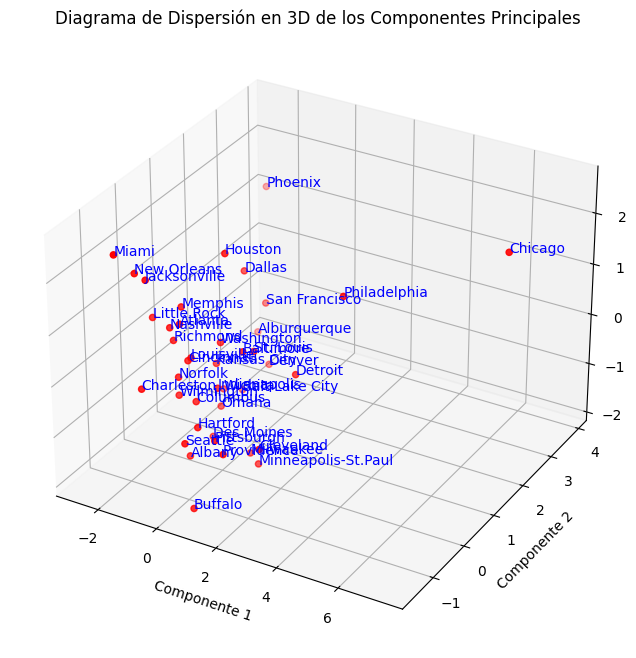

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y los ejes 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot de los componentes principales
scatter = ax.scatter(df_componentes_principales['Componente 1'],
                     df_componentes_principales['Componente 2'],
                     df_componentes_principales['Componente 3'], c='r', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Título del gráfico
ax.set_title('Diagrama de Dispersión en 3D de los Componentes Principales')

# Nombres de cada punto (ciudad)
for i, ciudad in enumerate(dataUSA['Ciudad']):
    ax.text(df_componentes_principales['Componente 1'][i],
            df_componentes_principales['Componente 2'][i],
            df_componentes_principales['Componente 3'][i],
            ciudad,color='blue')

# Mostrar el gráfico
plt.show()
